In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
#display the first 5 rows of the train dataset
df = pd.read_csv("/content/drive/MyDrive/Prodigy Internship/Machine Learning /Task_01/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


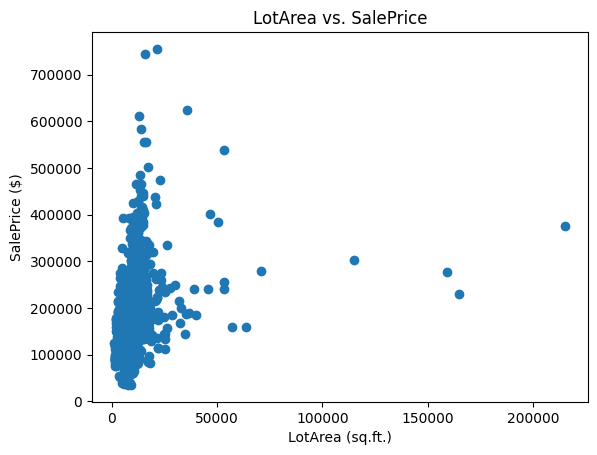

In [ ]:
# Visualize the relationship between LotArea and SalePrice
plt.scatter(df.LotArea, df.SalePrice)
plt.title('LotArea vs. SalePrice')
plt.xlabel('LotArea (sq.ft.)')
plt.ylabel('SalePrice ($)')
plt.show()

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df[['LotArea']], df.SalePrice)

LinearRegression()

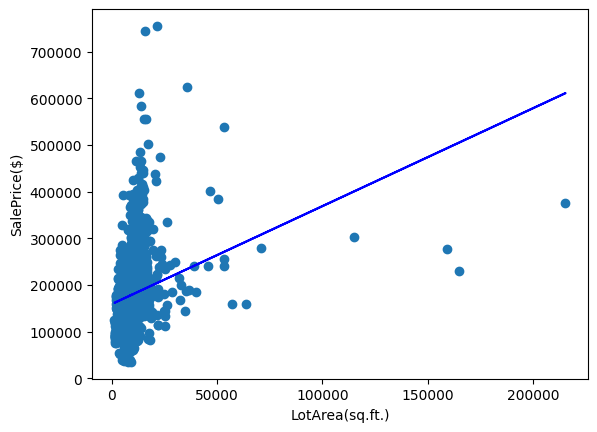

In [ ]:
plt.xlabel("LotArea(sq.ft.)")
plt.ylabel("SalePrice($)")
plt.scatter(df.LotArea, df.SalePrice)
plt.plot(df.LotArea, reg.predict(df[['LotArea']]), color='blue')

In [ ]:
reg.predict([[3000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([165136.067752])

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df.LotArea,df.SalePrice)

import numpy as np

MSE = np.square(np.subtract(df.LotArea,df.SalePrice)).mean()
print(MSE)


from sklearn import metrics
import math
actual = [0, 1, 2, 0, 3]
predicted = [0.1, 1.3, 2.1, 0.5, 3.1]

mse = metrics.mean_squared_error(actual,predicted)
print(mse)
rmse = math.sqrt(mse)
print(rmse)
mae = metrics.mean_absolute_error(actual,predicted) #Use if outliers in dataset
print(mae)

35025859017.006165
0.07400000000000001
0.2720294101747089
0.22000000000000003
